In [10]:
# Import models and utility functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


# ignore warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



# EDA

In [11]:
# import data
file = '/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv'
df = pd.read_csv(file)
print(df.columns)
df = df.rename(columns={'oldbalanceOrg': 'Old_Balance_Orig',
                        'newbalanceOrig': 'New_Balance_Orig',
                        'oldbalanceDest': 'Old_Balance_Dest',
                        'newbalanceDest': 'New_Balance_Dest',
                        'nameOrig': 'Name_Orig',
                        'nameDest': 'Name_Dest'})
print(df.head())
print(df.info())

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
   step      type    amount    Name_Orig  Old_Balance_Orig  New_Balance_Orig  \
0     1   PAYMENT   9839.64  C1231006815          170136.0         160296.36   
1     1   PAYMENT   1864.28  C1666544295           21249.0          19384.72   
2     1  TRANSFER    181.00  C1305486145             181.0              0.00   
3     1  CASH_OUT    181.00   C840083671             181.0              0.00   
4     1   PAYMENT  11668.14  C2048537720           41554.0          29885.86   

     Name_Dest  Old_Balance_Dest  New_Balance_Dest  isFraud  isFlaggedFraud  
0  M1979787155               0.0               0.0        0               0  
1  M2044282225               0.0               0.0        0               0  
2   C553264065               0.0               0.0        1               0  
3    C3899701

In [12]:
# EDA
print('\n The types of fraudulent transactions are {}'.format(
    list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))
#
print(df.shape)
#df = df.loc[(df.isFraud!=1)&(df.amount!=0)]

print(df.shape)


dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print('\n No.fraudulent in TRANSFERs = {}'.
      format(len(dfFraudTransfer)))
# The Number of

print('\n No.fraudulent in CASH_OUTs = {}'.
      format(len(dfFraudCashout)))

# data import and cleaning
X = df.loc[(df.type == 'TRANSFER')]
#X = df.loc[(df.type == 'CASH_OUT')]
y = X['isFraud']
del X['isFraud']

# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['Name_Orig', 'Name_Dest', 'isFlaggedFraud', 'type'], axis=1)
print(X.head())


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']
(6362620, 11)
(6362620, 11)

 No.fraudulent in TRANSFERs = 4097

 No.fraudulent in CASH_OUTs = 4116
    step     amount  Old_Balance_Orig  New_Balance_Orig  Old_Balance_Dest  \
2      1     181.00            181.00               0.0              0.00   
19     1  215310.30            705.00               0.0          22425.00   
24     1  311685.89          10835.00               0.0           6267.00   
58     1   62610.80          79114.00           16503.2            517.00   
78     1   42712.39          10363.39               0.0          57901.66   

    New_Balance_Dest  
2               0.00  
19              0.00  
24        2719172.89  
58           8383.29  
78          24044.18  


In [13]:
print(X)

         step      amount  Old_Balance_Orig  New_Balance_Orig  \
2           1      181.00            181.00               0.0   
19          1   215310.30            705.00               0.0   
24          1   311685.89          10835.00               0.0   
58          1    62610.80          79114.00           16503.2   
78          1    42712.39          10363.39               0.0   
...       ...         ...               ...               ...   
6362610   742    63416.99          63416.99               0.0   
6362612   743  1258818.82        1258818.82               0.0   
6362614   743   339682.13         339682.13               0.0   
6362616   743  6311409.28        6311409.28               0.0   
6362618   743   850002.52         850002.52               0.0   

         Old_Balance_Dest  New_Balance_Dest  
2                    0.00              0.00  
19               22425.00              0.00  
24                6267.00        2719172.89  
58                 517.00          

In [14]:
print('Number of duplicates are : ', df.duplicated().sum())

Number of duplicates are :  0


In [15]:
df.isnull().sum()

step                0
type                0
amount              0
Name_Orig           0
Old_Balance_Orig    0
New_Balance_Orig    0
Name_Dest           0
Old_Balance_Dest    0
New_Balance_Dest    0
isFraud             0
isFlaggedFraud      0
dtype: int64

In [16]:
df.head()

,step,type,amount,Name_Orig,Old_Balance_Orig,New_Balance_Orig,Name_Dest,Old_Balance_Dest,New_Balance_Dest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
import plotly.express as px
type = df["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(df, values=quantity, names=transactions,width=500,height=500, title="Distribution of Transaction Type",
                color_discrete_sequence=px.colors.sequential.RdBu)
figure.show()

In [18]:
import plotly.express as px

type_counts = df['type'].value_counts()

# Create a bar plot using Plotly Express
fig = px.bar(x=type_counts.index, y=type_counts.values, labels={'x': 'Transaction Type', 'y': 'Count'}, title='Transaction Type Distribution')

# Show the plot
fig.show()

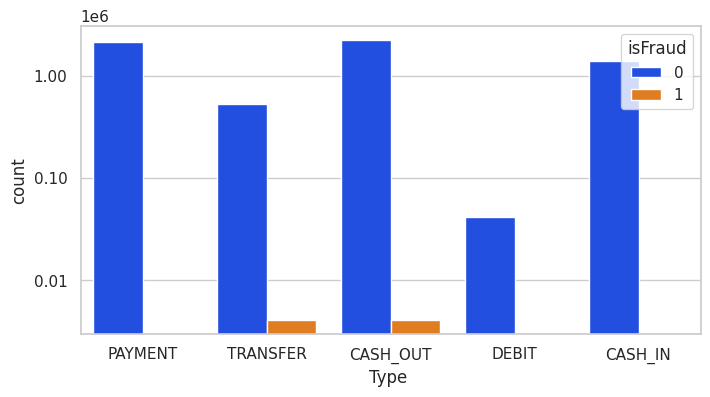

In [19]:
import matplotlib.ticker as mticker
def countplot_eda(df):
    sns.set_style('whitegrid')
    sns.set_context('notebook')
    plt.figure(figsize=(8, 4))
    counplot = sns.countplot(data=df, x='type', hue='isFraud',palette= "bright")
    counplot.set_xlabel('Type ')
    counplot.set_ylabel(f'count')
    counplot.set_yscale('log')
    counplot.yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.show()

countplot_eda(df)

*We can see, fraud transactions are done in TRANSFER and CASH_OUT transaction type.*

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [21]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Pie(labels=['Genuine','Fraud'], values=y_train.value_counts())])
fig.show()

In [22]:
print('size of X_train, X_test, y_train, y_test')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


size of X_train, X_test, y_train, y_test
(426327, 6) (106582, 6) (426327,) (106582,)


# Passive Agressive Classifier


In [23]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac_classifier = PassiveAggressiveClassifier()

# Train the model
pac_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pac_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of PAC result',acc)
from sklearn.metrics import confusion_matrix
print('confusion matrix of PAC with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

accuracy of PAC result 0.9996997616858382
confusion matrix of PAC with .2 random test data:
[[105728     13]
 [    19    822]]


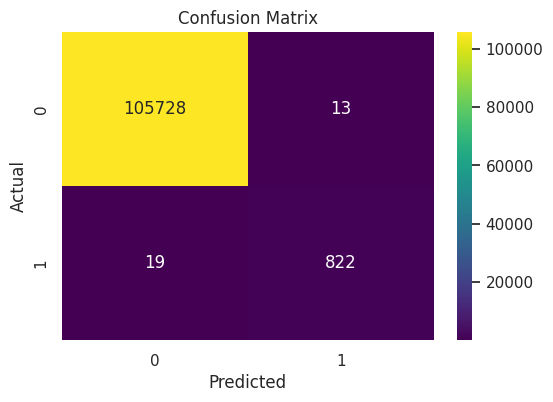

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier 

K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [27]:
maxk=0
maxaccuracy=0
for key in scores:
    if(maxaccuracy<scores[key][1]):
        maxk=key
        maxaccuracy=scores[key][1]
    print("K =",key,":",scores[key])
    
print("K value with max accuracy is :",maxk)
print("Maximum test data accuracy is :",maxaccuracy)

K = 2 : [0.9999577788880366, 0.9999061755268244]
K = 3 : [0.9998827191334352, 0.9998967930795069]
K = 4 : [0.9998780278987726, 0.9998967930795069]
K = 5 : [0.9998475348734657, 0.9998874106321893]
K = 6 : [0.9998475348734657, 0.9998874106321893]
K = 7 : [0.999826424317484, 0.9998874106321893]
K = 8 : [0.9998217330828214, 0.9998780281848717]
K = 9 : [0.9998006225268398, 0.9998686457375542]
K = 10 : [0.9997982769095084, 0.9998592632902367]
K = 11 : [0.9997724751188641, 0.9998217335009664]
K = 12 : [0.9997748207361955, 0.9998217335009664]
K = 13 : [0.9997654382668703, 0.9998217335009664]
K = 14 : [0.9997654382668703, 0.9998217335009664]
K = 15 : [0.9997560557975451, 0.9998123510536489]
K = 16 : [0.9997560557975451, 0.9998123510536489]
K = 17 : [0.999739636476226, 0.9998123510536489]
K = 18 : [0.999739636476226, 0.9998123510536489]
K = 19 : [0.9997279083895695, 0.9997935861590137]
K = 20 : [0.9997279083895695, 0.9997935861590137]
K value with max accuracy is : 2
Maximum test data accuracy i

# Decision Tree

In [28]:
dt = DecisionTreeClassifier(max_depth=5, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of decision tree result',acc)

accuracy of decision tree result 0.9997466739224259


In [29]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105741
           1       0.98      0.99      0.98       841

    accuracy                           1.00    106582
   macro avg       0.99      0.99      0.99    106582
weighted avg       1.00      1.00      1.00    106582



In [30]:
#confusion matrix of decision tree result with .2 random test dataset
from sklearn.metrics import confusion_matrix
print('confusion matrix of decision tree with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))


confusion matrix of decision tree with .2 random test data:
[[105726     15]
 [    12    829]]


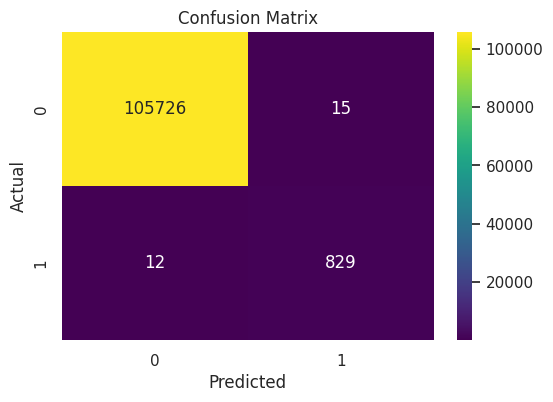

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Multinomial Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()

# Train the model
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    105741
           1       0.36      1.00      0.53       841

    accuracy                           0.99    106582
   macro avg       0.68      0.99      0.76    106582
weighted avg       0.99      0.99      0.99    106582



# Gaussian Naives Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics like precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105741
           1       0.54      0.54      0.54       841

    accuracy                           0.99    106582
   macro avg       0.77      0.77      0.77    106582
weighted avg       0.99      0.99      0.99    106582



# logistic regression

In [34]:
from sklearn import linear_model
from time import time
clf = linear_model.LogisticRegression()

clf.fit(X_train,y_train)

b = time()
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of Logistic regression result',acc)

a = time()
print('confusion matrix of logistic regression with .2 random test data:')
print(confusion_matrix(y_test, y_pred))

accuracy of Logistic regression result 0.9989679307950686
confusion matrix of logistic regression with .2 random test data:
[[105687     54]
 [    56    785]]


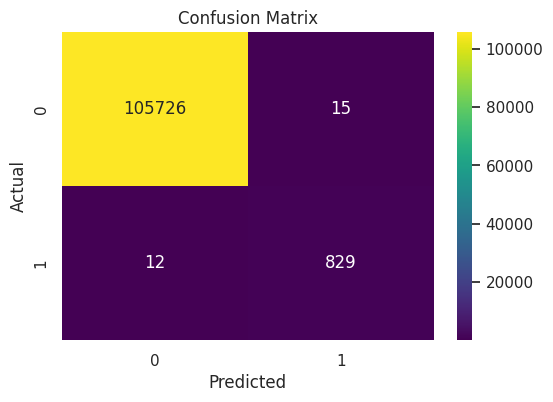

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105741
           1       0.94      0.93      0.93       841

    accuracy                           1.00    106582
   macro avg       0.97      0.97      0.97    106582
weighted avg       1.00      1.00      1.00    106582



# L2 logistic regression

In [37]:
from sklearn import linear_model
from time import time
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)

clf.fit(X_train,y_train)

b = time()
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of logistic regression result',acc)

print('confusion matrix of L2 logistic regression with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))


accuracy of logistic regression result 0.9989679307950686
confusion matrix of L2 logistic regression with .2 random test data:
[[105687     54]
 [    56    785]]


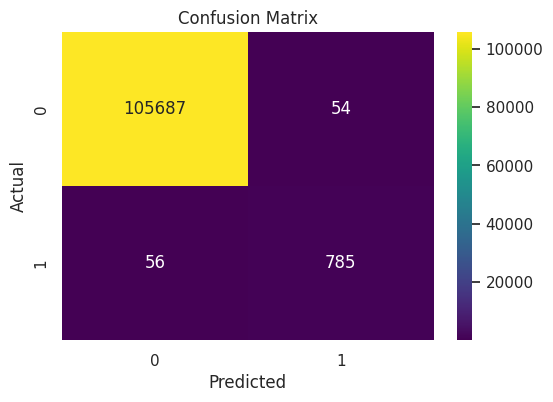

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105741
           1       0.94      0.93      0.93       841

    accuracy                           1.00    106582
   macro avg       0.97      0.97      0.97    106582
weighted avg       1.00      1.00      1.00    106582



# Neural Network

In [40]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,# minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

2024-05-06 05:11:11.361634: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 05:11:11.361744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 05:11:11.457992: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [41]:
model=keras.Sequential()
#input layer
model.add(Dense(units=256, activation='relu'))
layers.BatchNormalization()
#hidden layers
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
#output layer
model.add(Dense(units=1, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [43]:
history=model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5000
        , callbacks=[early_stopping])

Epoch 1/100
 3/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - binary_accuracy: 0.3890 - loss: 25209.2832

I0000 00:00:1714972288.330976     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714972288.349014     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 0.9051 - loss: 24837.2344

W0000 00:00:1714972293.014946     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714972293.622316     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - binary_accuracy: 0.9058 - loss: 24657.4941 - val_binary_accuracy: 0.9958 - val_loss: 22.5372
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - binary_accuracy: 0.9934 - loss: 255.8296 - val_binary_accuracy: 0.9877 - val_loss: 134.5506
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - binary_accuracy: 0.9918 - loss: 138.0118 - val_binary_accuracy: 0.9984 - val_loss: 33.9783
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - binary_accuracy: 0.9895 - loss: 725.1241 - val_binary_accuracy: 0.9933 - val_loss: 91.3937
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - binary_accuracy: 0.9957 - loss: 312.8789 - val_binary_accuracy: 0.9997 - val_loss: 25.3502
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - binary_accuracy: 0.9949 - loss: 699.5299 - val_binary_accuracy: 0.9983 - val_loss: 122.5947
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - binary_accuracy: 0.9802 - loss: 7062.0981 - val_binary_accuracy: 0.9976 - val_loss:

Minimum validation loss: 0.7391521334648132


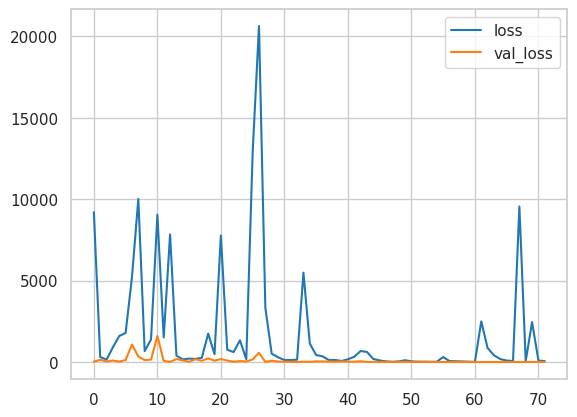

In [44]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [45]:
#Train Data accuracy
y_TrainAccuracy = model.predict(X_train)
y_TrainAccuracy = [0 if val < 0.5 else 1 for val in y_TrainAccuracy]
accuracy_score(y_train, y_TrainAccuracy)

  103/13323 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step    

W0000 00:00:1714972590.974197     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13323/13323 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step


0.9998616085774534

In [46]:
#Test Data accuracy
y_TestAccuracy = model.predict(X_test)
y_TestAccuracy = [0 if val < 0.5 else 1 for val in y_TestAccuracy]
accuracy_score(y_test, y_TestAccuracy)

3331/3331 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


0.9998404983956015

# SMOTE

In [47]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)
fig=go.Figure(data=[go.Pie(labels=['Genuine','Fraud'],values=y_train.value_counts())])
fig.show()

In [48]:
over_sample = SMOTE(random_state=42)
X_train_sm, y_train_sm = over_sample.fit_resample(X_train,y_train)

In [51]:
print(sum(y_train_sm == 1), '- positive class')
print(sum(y_train_sm == 0), '- negative class')

423071 - positive class
423071 - negative class


# Logistic Regression

In [52]:
from sklearn import linear_model
from time import time
clf = linear_model.LogisticRegression()

clf.fit(X_train_sm, y_train_sm)


b = time()
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of Logistic regression result',acc)

a = time()
print('confusion matrix of logistic regression with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(cm)

accuracy of Logistic regression result 0.9792741738755137
confusion matrix of logistic regression with .2 random test data:
[[103533   2208]
 [     1    840]]


# KNN classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier 

K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [54]:
maxk
maxaccuracy=0
for key in scores:
    if(maxaccuracy<scores[key][1]):
        maxk=key
        maxaccuracy=scores[key][1]
    print("K =",key,":",scores[key])
    
print("K value with max accuracy is :",maxk)
print("Maximum test data accuracy is :",maxaccuracy)

K = 2 : [0.9997849060795942, 0.999596554765345]
K = 3 : [0.9996076308704686, 0.9993150813458183]
K = 4 : [0.9994941747366282, 0.9995496425287572]
K = 5 : [0.9994315374960704, 0.9993338462404534]
K = 6 : [0.9993901732806078, 0.9994652005028992]
K = 7 : [0.9993369907178701, 0.9993526111350884]
K = 8 : [0.9992826263204049, 0.9994745829502167]
K = 9 : [0.9992566259563997, 0.9994182882663114]
K = 10 : [0.9992294437576672, 0.9994933478448519]
K = 11 : [0.9992105344020271, 0.9994276707136289]
K = 12 : [0.9991904432116595, 0.9994558180555816]
K = 13 : [0.9991703520212919, 0.9994182882663114]
K = 14 : [0.9991549881698344, 0.9994933478448519]
K = 15 : [0.9991289878058293, 0.9993901409243587]
K = 16 : [0.9991124421196442, 0.9994370531609466]
K = 17 : [0.9990888054250942, 0.9993995233716763]
K = 18 : [0.9990722597389091, 0.9994652005028992]
K = 19 : [0.9990568958874515, 0.9993995233716763]
K = 20 : [0.9990438957054489, 0.9994370531609466]
K value with max accuracy is : 2
Maximum test data accuracy

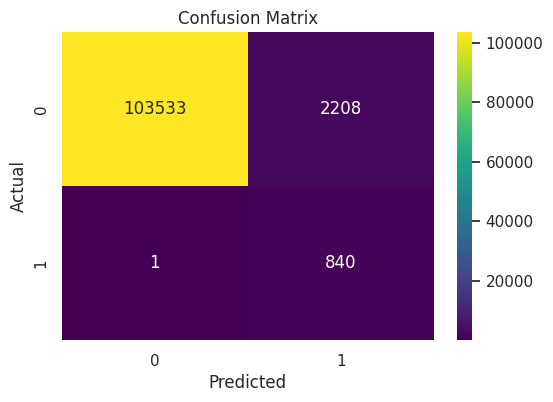

In [56]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    105741
           1       0.28      1.00      0.43       841

    accuracy                           0.98    106582
   macro avg       0.64      0.99      0.71    106582
weighted avg       0.99      0.98      0.99    106582



# Passive Agressive Classifier

In [58]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac_classifier = PassiveAggressiveClassifier()

# Train the model
pac_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred = pac_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of PAC result',acc)
from sklearn.metrics import confusion_matrix
print('confusion matrix of PAC with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

accuracy of PAC result 0.9972040306993676
confusion matrix of PAC with .2 random test data:
[[105450    291]
 [     7    834]]


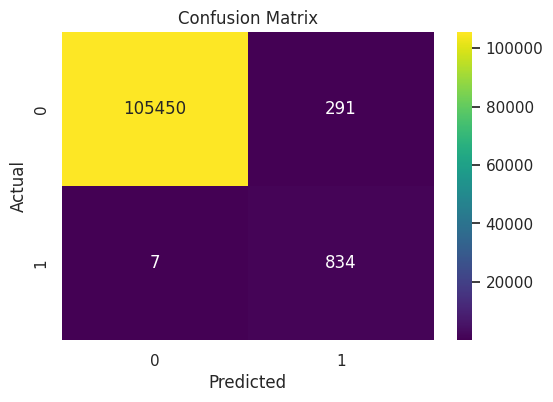

In [59]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105741
           1       0.74      0.99      0.85       841

    accuracy                           1.00    106582
   macro avg       0.87      0.99      0.92    106582
weighted avg       1.00      1.00      1.00    106582



# User Input

In [62]:
#user_input=(1,9839,170136,160291,0,0)
#user_input=(1,181,181,9,0,0)
#user_input=(1,7817,53860,46042,0,0)
user_input=(1,402,2673,434389,0,0)
#changing the user_input to numpy array
userInputArray=np.asarray(user_input)
#reshaping the numpy array
userInputReshaped=userInputArray.reshape(1,-1)
prediction=pac_classifier.predict(userInputReshaped)

if(prediction[0]==1):
  print("It is fraudulent transaction")
else:
  print("It is not a fraudulent transaction")

It is not a fraudulent transaction


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PassiveAggressiveClassifier was fitted with feature names



# Decision Tree

In [63]:
dt = DecisionTreeClassifier(max_depth=5, random_state=1)
dt.fit(X_train_sm, y_train_sm)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of decision tree result',acc)

accuracy of decision tree result 0.9995590249760747


In [64]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105741
           1       0.95      1.00      0.97       841

    accuracy                           1.00    106582
   macro avg       0.98      1.00      0.99    106582
weighted avg       1.00      1.00      1.00    106582



In [65]:
#confusion matrix of decision tree result with .2 random test dataset
from sklearn.metrics import confusion_matrix
print('confusion matrix of decision tree with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))


confusion matrix of decision tree with .2 random test data:
[[105697     44]
 [     3    838]]


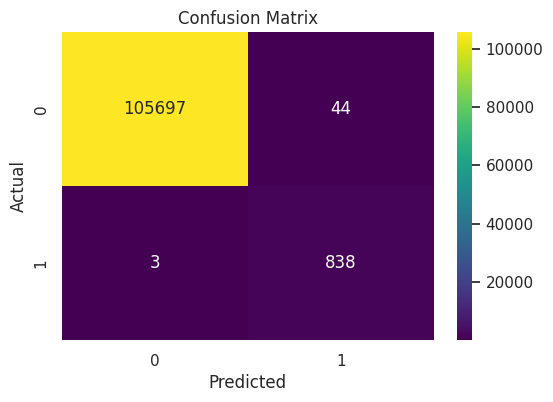

In [66]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train_sm, y_train_sm)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics like precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    105741
           1       0.19      1.00      0.32       841

    accuracy                           0.97    106582
   macro avg       0.59      0.98      0.65    106582
weighted avg       0.99      0.97      0.98    106582



confusion matrix of decision tree with .2 random test data:
[[102107   3634]
 [     3    838]]


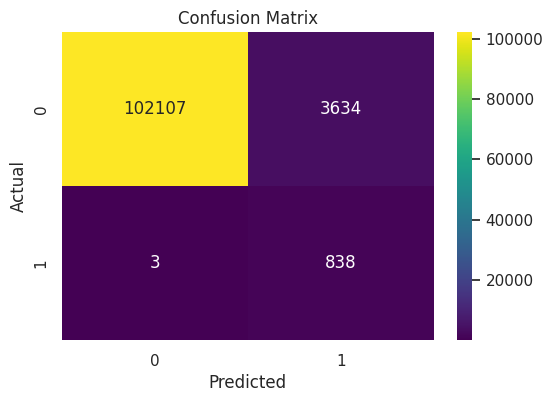

In [68]:
#confusion matrix of decision tree result with .2 random test dataset
from sklearn.metrics import confusion_matrix
print('confusion matrix of decision tree with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Multinomial Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()

# Train the model
naive_bayes_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    105741
           1       0.37      1.00      0.54       841

    accuracy                           0.99    106582
   macro avg       0.68      0.99      0.77    106582
weighted avg       0.99      0.99      0.99    106582



confusion matrix of decision tree with .2 random test data:
[[104300   1441]
 [     2    839]]


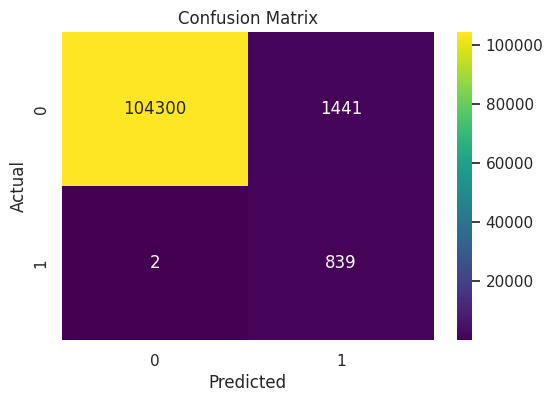

In [70]:
#confusion matrix of decision tree result with .2 random test dataset
from sklearn.metrics import confusion_matrix
print('confusion matrix of decision tree with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# L2 Logistic Regression

In [71]:
from sklearn import linear_model
from time import time
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)

clf.fit(X_train_sm,y_train_sm)

b = time()
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of logistic regression result',acc)




accuracy of logistic regression result 0.9792741738755137


In [72]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    105741
           1       0.28      1.00      0.43       841

    accuracy                           0.98    106582
   macro avg       0.64      0.99      0.71    106582
weighted avg       0.99      0.98      0.99    106582



confusion matrix of L2 logistic regression with .2 random test data:
[[103533   2208]
 [     1    840]]


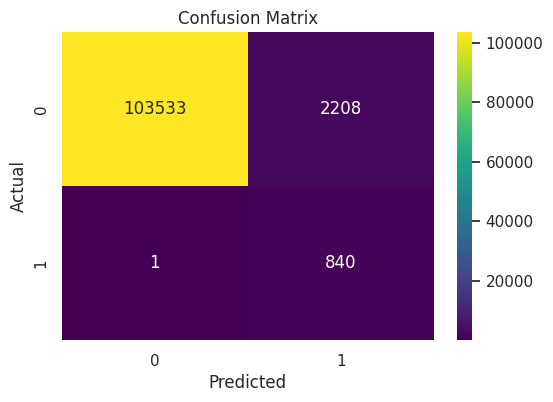

In [73]:
print('confusion matrix of L2 logistic regression with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Network

In [74]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,# minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [75]:
model=keras.Sequential()
#input layer
model.add(Dense(units=256, activation='relu'))
layers.BatchNormalization()
#hidden layers
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
#output layer
model.add(Dense(units=1, activation='sigmoid'))

In [76]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [77]:
history=model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5000
        , callbacks=[early_stopping])

Epoch 1/100
  2/170 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - binary_accuracy: 0.4772 - loss: 111045.2656

W0000 00:00:1714974692.871637     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - binary_accuracy: 0.9157 - loss: 18570.6816

W0000 00:00:1714974701.236899     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714974701.700108     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - binary_accuracy: 0.9159 - loss: 18500.1152 - val_binary_accuracy: 0.9995 - val_loss: 363.8022
Epoch 2/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9784 - loss: 1857.2600 - val_binary_accuracy: 0.9978 - val_loss: 2910.3962
Epoch 3/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9789 - loss: 34051.4023 - val_binary_accuracy: 0.9871 - val_loss: 5427.6689
Epoch 4/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - binary_accuracy: 0.9886 - loss: 6403.7393 - val_binary_accuracy: 0.9998 - val_loss: 124.6378
Epoch 5/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - binary_accuracy: 0.9942 - loss: 2167.6880 - val_binary_accuracy: 0.9998 - val_loss: 68.0045
Epoch 6/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - binary_accuracy: 0.9938 - loss: 194.9067 - val_binary_accuracy: 0.9998 - val_loss: 9.0152
Epoch 7/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - binary_accuracy: 0.9927 - loss: 267.1967 - val_binary_accurac

Minimum validation loss: 9.015216827392578


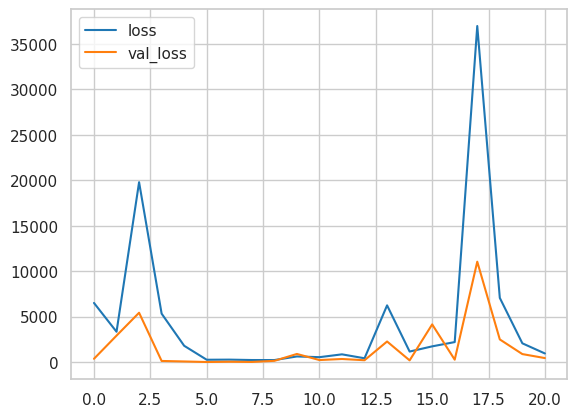

In [78]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [79]:
#Train Data accuracy
y_TrainAccuracy = model.predict(X_train)
y_TrainAccuracy = [0 if val < 0.5 else 1 for val in y_TrainAccuracy]
accuracy_score(y_train, y_TrainAccuracy)

  115/26442 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step    

W0000 00:00:1714975167.333028     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26442/26442 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step


W0000 00:00:1714975202.112933     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


0.9974377823107705

In [80]:
#Test Data accuracy
y_TestAccuracy = model.predict(X_test)
y_TestAccuracy = [0 if val < 0.5 else 1 for val in y_TestAccuracy]
accuracy_score(y_test, y_TestAccuracy)

3331/3331 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


0.9997748212643786

# Pipeline

In [81]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, roc_auc_score, accuracy_score, confusion_matrix
import pandas as pd

# Load data
file = '/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv'
df = pd.read_csv(file)
df = df.rename(columns={'oldbalanceOrg': 'Old_Balance_Orig',
                        'newbalanceOrig': 'New_Balance_Orig',
                        'oldbalanceDest': 'Old_Balance_Dest',
                        'newbalanceDest': 'New_Balance_Dest',
                        'nameOrig': 'Name_Orig',
                        'nameDest': 'Name_Dest'})

# Filter data for TRANSFER type
X = df.loc[(df.type == 'TRANSFER')]
y = X['isFraud']
del X['isFraud']
X = X.drop(['Name_Orig', 'Name_Dest', 'isFlaggedFraud', 'type'], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Passive Aggressive Classifier": PassiveAggressiveClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network":MLPClassifier(),
    "KNN Classifer" :KNeighborsClassifier(n_neighbors = 2) 
}

# Create an empty list to store results
results = []

# Train and evaluate each pipeline
for name, clf in classifiers.items():
    print(f"Training {name}...")
    pipeline = Pipeline([
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = MSE(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results in the list
    results.append({
        "Classifier": name,
        "MSE": mse,
        "AUC": auc_score,
        "Accuracy": accuracy,
        "Confusion Matrix": cm
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)


Training Logistic Regression...
Training Passive Aggressive Classifier...
Training Gaussian Naive Bayes...
Training Multinomial Naive Bayes...
Training Decision Tree...
Training Neural Network...
Training KNN Classifer...
                      Classifier       MSE       AUC  Accuracy  \
0            Logistic Regression  0.000713  0.968637  0.999287   
1  Passive Aggressive Classifier  0.000188  0.993347  0.999812   
2           Gaussian Naive Bayes  0.006239  0.775057  0.993761   
3        Multinomial Naive Bayes  0.012404  0.990768  0.987596   
4                  Decision Tree  0.000169  0.992164  0.999831   
5                 Neural Network  0.000160  0.993957  0.999840   
6                  KNN Classifer  0.000094  0.995779  0.999906   

              Confusion Matrix  
0    [[105726, 24], [52, 780]]  
1     [[105741, 9], [11, 821]]  
2  [[105457, 293], [372, 460]]  
3   [[104433, 1317], [5, 827]]  
4     [[105745, 5], [13, 819]]  
5     [[105743, 7], [10, 822]]  
6      [[105747, 3

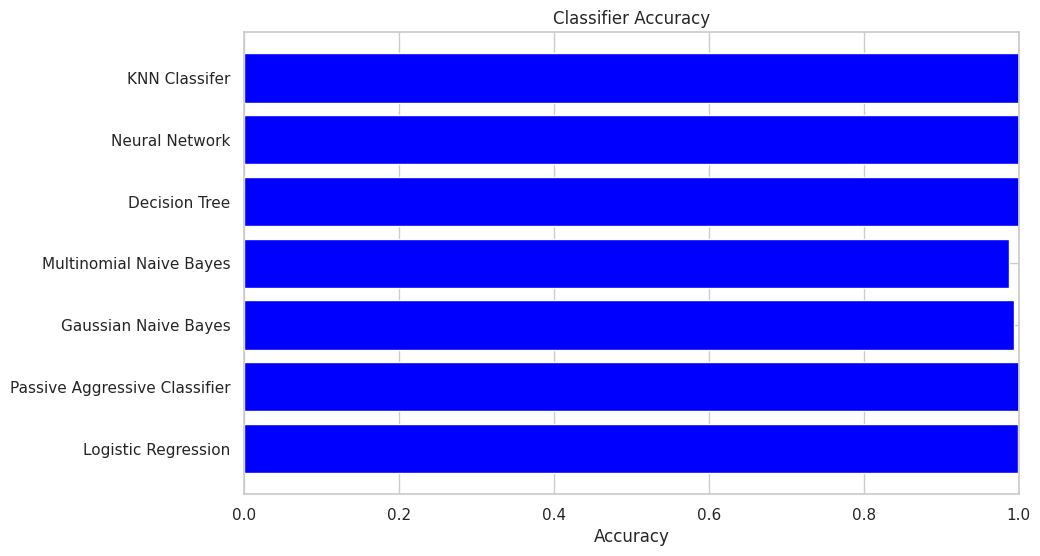

In [82]:
import matplotlib.pyplot as plt

# Create bar plot for results
plt.figure(figsize=(10, 6))
plt.barh(results_df['Classifier'], results_df['Accuracy'], color='blue')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
plt.xlim(0, 1)
plt.show()